# 1. Importing requisite labraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os #change to directory
from IPython import display # It can be used to display images, text, dataframes, and other objects

# 2. Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Diamond Case study')

In [ ]:
os.listdir()

['Diamond Case Study.ipynb',
 'diamonds.csv',
 'carat_.jpg',
 'color.jpg',
 'clarity_.jpg']

In [ ]:
df=pd.read_csv('diamonds.csv')

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# 3. EDA

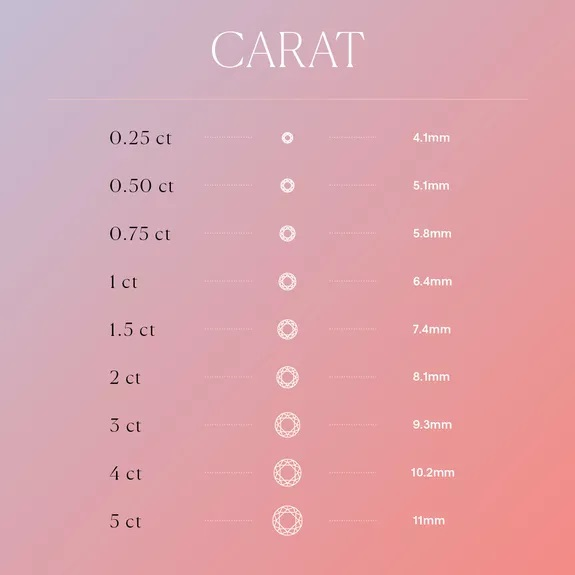

In [ ]:
display.Image('carat_.jpg')

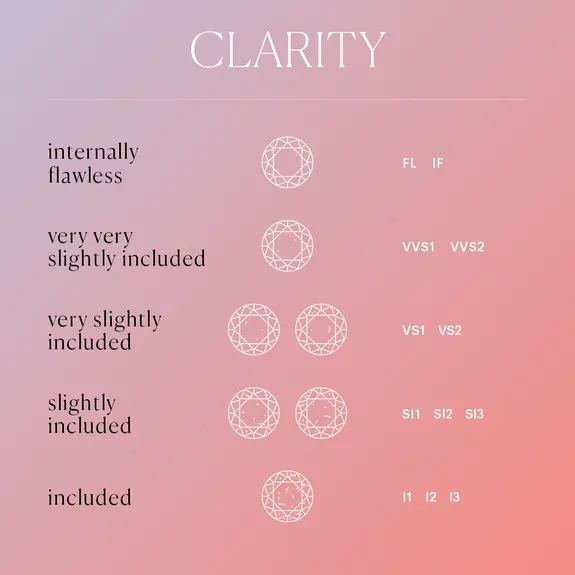

In [ ]:
display.Image('clarity_.jpg')

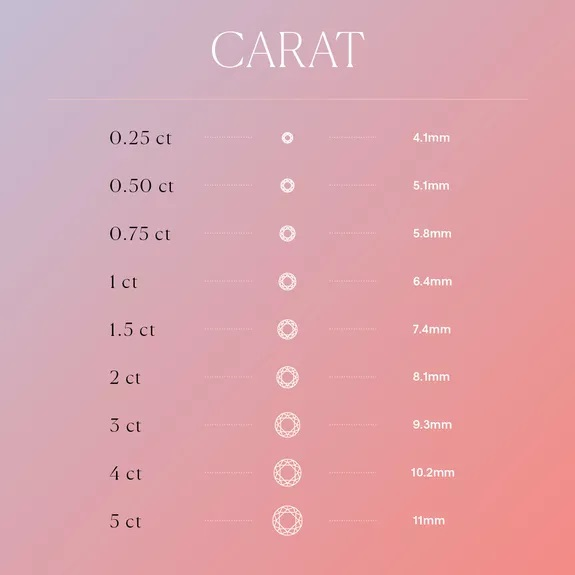

In [ ]:
display.Image('carat_.jpg')

In [ ]:
df.describe

<bound method NDFrame.describe of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [ ]:
# Rename the columns
df.rename(columns={"x":"length","y":"width","z":"depth","depth":"depth_percentage","table":"table_percent"},inplace=True)

In [ ]:
df.head()

,carat,cut,color,clarity,depth_percentage,table_percent,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,53940.0,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth_percentage,53940.0,NaN,NaN,NaN,61.749405,1.432621,43.0,61.0,61.8,62.5,79.0
table_percent,53940.0,NaN,NaN,NaN,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0
price,53940.0,NaN,NaN,NaN,3932.799722,3989.439738,326.0,950.0,2401.0,5324.25,18823.0
length,53940.0,NaN,NaN,NaN,5.731157,1.121761,0.0,4.71,5.7,6.54,10.74
width,53940.0,NaN,NaN,NaN,5.734526,1.142135,0.0,4.72,5.71,6.54,58.9
depth,53940.0,NaN,NaN,NaN,3.538734,0.705699,0.0,2.91,3.53,4.04,31.8


## Some observations in this data
1. 53940 datapoints with 10 feautre in data
2. there are three categories and seven numerical data in this.
3. Most common diamond in data set `ideal` cut, color `G` nearly colorless and ST1 e(slightly Included clarity)
4. length width and depth have min 0 => outliers


In [ ]:
# check for null values
df.isnull().sum()

carat               0
cut                 0
color               0
clarity             0
depth_percentage    0
table_percent       0
price               0
length              0
width               0
depth               0
dtype: int64

In [ ]:
# check outliers
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth_percentage', 'table_percent',
       'price', 'length', 'width', 'depth'],
      dtype='object')

In [ ]:
df['l/w']=df["length"]/df["width"]

In [ ]:
df.head()

,carat,cut,color,clarity,depth_percentage,table_percent,price,length,width,depth,l/w
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [ ]:
df.head()

,carat,cut,color,clarity,depth_percentage,table_percent,price,length,width,depth,l/w
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [ ]:
print(df['cut'].unique().tolist())
print(df['color'].unique().tolist())
print(df['clarity'].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['E', 'I', 'J', 'H', 'F', 'G', 'D']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']


In [ ]:
df.describe(include="all")

,carat,cut,color,clarity,depth_percentage,table_percent,price,length,width,depth,l/w
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53933.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.999409
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.012434
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.992625
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,1.006944


In [ ]:
print(df.loc[(df["length"]==0)|(df["width"]==0)|(df["depth"]==0)|(df["l/w"]==0)])

       carat        cut color clarity  depth_percentage  table_percent  price  \
2207    1.00    Premium     G     SI2              59.1           59.0   3142   
2314    1.01    Premium     H      I1              58.1           59.0   3167   
4791    1.10    Premium     G     SI2              63.0           59.0   3696   
5471    1.01    Premium     F     SI2              59.2           58.0   3837   
10167   1.50       Good     G      I1              64.0           61.0   4731   
11182   1.07      Ideal     F     SI2              61.6           56.0   4954   
11963   1.00  Very Good     H     VS2              63.3           53.0   5139   
13601   1.15      Ideal     G     VS2              59.2           56.0   5564   
15951   1.14       Fair     G     VS1              57.5           67.0   6381   
24394   2.18    Premium     H     SI2              59.4           61.0  12631   
24520   1.56      Ideal     G     VS2              62.2           54.0  12800   
26123   2.25    Premium     

In [ ]:
print("length: ", len(df.loc[(df["length"]==0)|(df["width"]==0)|(df["depth"]==0)|(df["l/w"]==0)]))

length:  20


In [ ]:
# replace `0` with `NaN` Value

In [ ]:
df[["length","width","depth","l/w"]]=df[["length","width","depth","l/w"]].replace(0,np.NaN)
df.dropna(inplace=True)
df.shape

(53920, 11)

In [ ]:
df.describe(include='all')

,carat,cut,color,clarity,depth_percentage,table_percent,price,length,width,depth,l/w
count,53920.000000,53920,53920,53920,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21548,11284,13063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797698,NaN,NaN,NaN,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,0.999425
std,0.473795,NaN,NaN,NaN,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,0.011666
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.137351
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,0.992625
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,1.006944


<ipython-input-45-36200bd83676>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=8, center=0,ax=ax, cmap="coolwarm")


<Axes: >

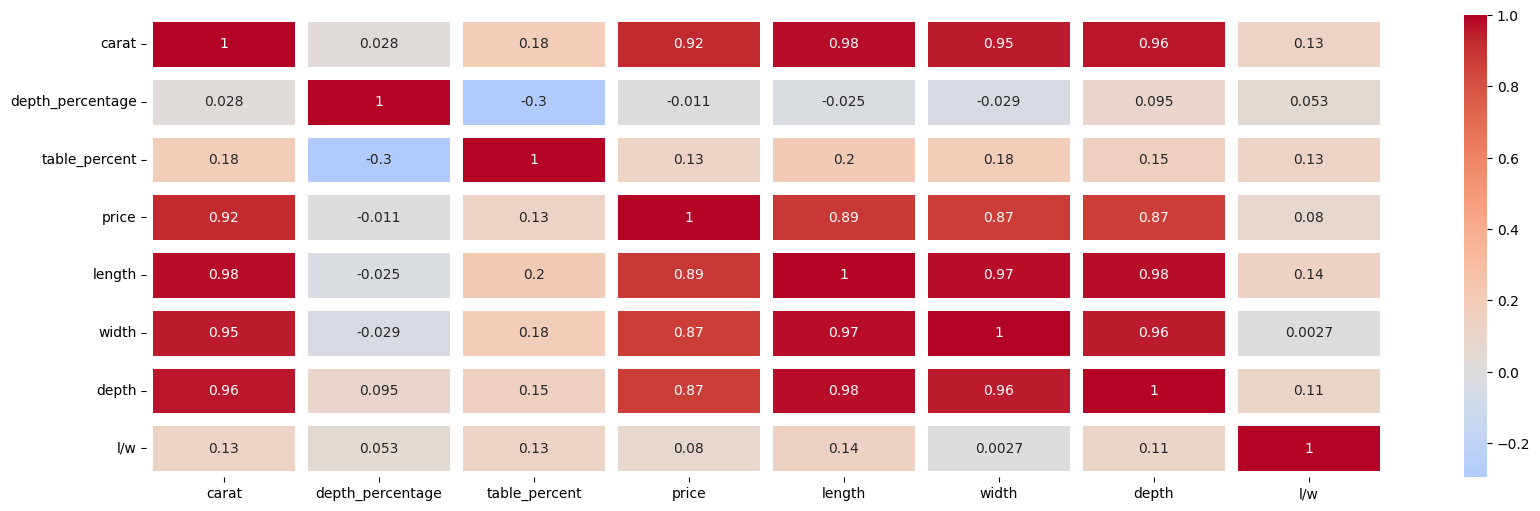

In [ ]:
# finding colrealted features
f,ax=plt.subplots(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,linewidths=8, center=0,ax=ax, cmap="coolwarm")

# 4. Data Preprocessing

In [ ]:
df['clarity'].unique()
#df['color'].unique()
#df['cut'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
# Label Incoding (for ordinal catagorical data)
df['clarity_score']=df["clarity"].replace(["IF","VVS1","VVS2","VS1","VS2", "SI1","SI2","I1"],[8,7,6,5,4,3,2,1])
df["color_score"]=df["color"].replace(["D","G","F","H","J","I","E"],[7,6,5,4,3,2,1])
df['cut_score']=df['cut'].replace(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'],[5,4,3,2,1])

In [ ]:
df.head()

,carat,cut,color,clarity,depth_percentage,table_percent,price,length,width,depth,l/w,clarity_score,color_score,cut_score
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462,2,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021,3,1,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086,5,1,3
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908,4,2,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701,2,3,3


<Axes: xlabel='price', ylabel='Density'>

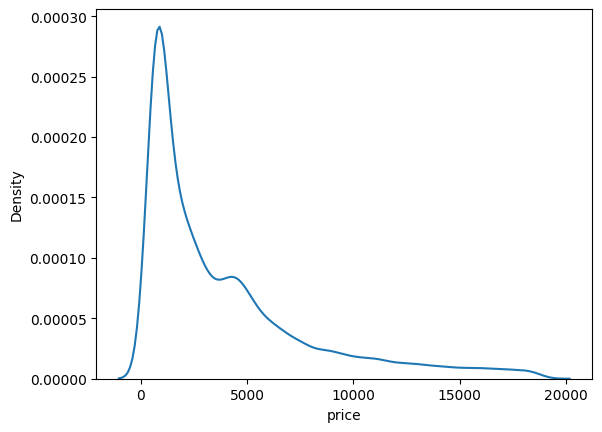

In [ ]:
sns.kdeplot(data=df['price'])

In [ ]:
#log transformation the output
df['price_log']=pd.DataFrame({"price":np.log(df["price"])})
df.head()

,carat,cut,color,clarity,depth_percentage,table_percent,price,length,width,depth,l/w,clarity_score,color_score,cut_score,price_log
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462,2,1,5,5.786897
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021,3,1,4,5.786897
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086,5,1,3,5.789960
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908,4,2,4,5.811141
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701,2,3,3,5.814131


<Axes: xlabel='price_log', ylabel='Density'>

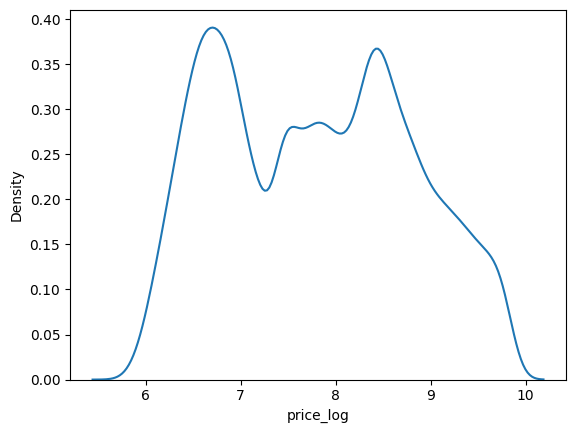

In [ ]:
sns.kdeplot(data=df['price_log'])

In [ ]:
#separate input and output
Y=df["price_log"]
X=df[['carat','depth','length','width']]


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
cols=['carat','depth','length','width']

In [ ]:
#standarization
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_transformed=pd.DataFrame(scale.fit_transform(x_train),columns=cols,index=x_train.index)
x_test_transformed=pd.DataFrame(scale.transform(x_test),columns=cols,index=x_test.index)

x_train_transformed.head()

,carat,depth,length,width
15208,0.452686,0.641485,0.609560,0.569153
26174,2.762477,2.190628,2.212312,2.186174
47819,-0.564470,-0.481288,-0.393279,-0.353604
52204,-0.183036,0.044568,-0.017214,0.006711
12867,0.685784,0.797821,0.842362,0.788857


In [ ]:
x_train_transformed.describe()

,carat,depth,length,width
count,4.313600e+04,4.313600e+04,4.313600e+04,4.313600e+04
mean,-5.172256e-17,3.968141e-16,-1.581327e-17,4.697858e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.263764e+00,-3.508512e+00,-1.790090e+00,-1.803649e+00
25%,-8.399495e-01,-8.934453e-01,-9.126058e-01,-8.896810e-01
50%,-2.042272e-01,-1.938774e-02,-2.616784e-02,-1.965356e-02
75%,5.162581e-01,6.983343e-01,7.259614e-01,7.009753e-01
max,7.848256e+00,4.016594e+01,4.029957e+00,4.672455e+01


# 5. Model building

In [ ]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(x_train_transformed, y_train)
y_pred_LR=LR_model.predict(x_test_transformed)

In [ ]:
from sklearn import metrics
mae_LR =metrics.mean_absolute_error(y_test,y_pred_LR)
print("Mean absolute error", mae_LR)
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred_LR))
print("Root mean squared error",np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR)))

Mean absolute error 0.20453583277097057
Mean Squared Error 0.06925995550048748
Root mean squared error 0.26317286239368887


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
KNN_model=KNeighborsRegressor()
KNN_model.fit(x_train_transformed, y_train)
y_pred_KNN=KNN_model.predict(x_test_transformed)

In [ ]:
mae_KNN =metrics.mean_absolute_error(y_test,y_pred_LR)
print("Mean absolute error",mae_KNN)
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred_KNN))
print("Root mean squared error",np.sqrt(metrics.mean_squared_error(y_test,y_pred_KNN)))

Mean absolute error 0.19744724036986264
Mean Squared Error 0.06465205559488577
Root mean squared error 0.25426768492060836


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train_transformed, y_train)
y_pred_dt=dt_model.predict(x_test_transformed)

mae_dt =metrics.mean_absolute_error(y_test,y_pred_dt)
print("Mean absolute error",mae_dt)
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred_dt))
print("Root mean squared error",np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt)))

Mean absolute error 0.19744724036986264
Mean Squared Error 0.10515658536837073
Root mean squared error 0.3242785613764356


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(x_train_transformed, y_train)
y_pred_rf=rf_model.predict(x_test_transformed)

mae_rf =metrics.mean_absolute_error(y_test,y_pred_rf)
print("Mean absolute error",mae_rf)
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred_rf))
print("Root mean squared error",np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)))

Mean absolute error 0.19989669550650183
Mean Squared Error 0.06622638556341742
Root mean squared error 0.2573448766993767


In [ ]:
#Supprt vector Regression
from sklearn.svm import SVR
svr_model=SVR()
svr_model.fit(x_train_transformed, y_train)
y_pred_svr=svr_model.predict(x_test_transformed)

mae_svr =metrics.mean_absolute_error(y_test,y_pred_svr)
print("Mean absolute error",mae_svr)
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred_svr))
print("Root mean squared error",np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr)))

Mean absolute error 0.18983519051341097
Mean Squared Error 0.05857969831963757
Root mean squared error 0.24203243237144392


In [ ]:
## Evaluation
evaluation =pd.DataFrame({"Algorithms":["Liniar Reg","KNN Reg","Deceision Tree","Random Forest","support vactoe reg"],"MAE":[mae_LR,mae_KNN,mae_dt,mae_rf,mae_svr]})

In [ ]:
evaluation

,Algorithms,MAE
0,Liniar Reg,0.204536
1,KNN Reg,0.197447
2,Deceision Tree,0.197447
3,Random Forest,0.199897
4,support vactoe reg,0.189835
